# Simple Real time recognition application.


*If errors persist, kindly refer **error.txt file**.<br>
Also see the **ReadMe.md file**, for overall instructions.*

This notebook doesnot contain the code to train model, I have placed all the experimented codes/notebooks in other directory. <br>

<a id="toc"></a>
<h2 data-toggle="list" role="tab" aria-controls="home">Code Sections</h2>

The sections are divided as: <br>
- [1. Data Collection](#1)<br>
- [2. Load trained model and Real Time application](#2)<br>


Note:<br>
If you don't want to collect your own data, but train your model. kindly import libraries and skip the Data Collection section of this notebook. Follow the path below: <br>
Run,<br>
[Dependencies](#7)<br>
[Download dataset](#6) and continue to the end of notebook. <br>

<a id="7"></a>
<h1> Dependencies</h1> 

In [ ]:
# installing dependencies
# !pip install tensorflow==2.9.0 tensorflow-gpu==2.9.0 opencv-python mediapipe sklearn matplotlib

In [1]:
import os
import cv2
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from cvzone.HandTrackingModule import HandDetector

from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier

from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np


<a id="1"></a>
<h1> Dataset Collection</h1> 

In [2]:
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']


In [4]:
# creating directories for classes
IMAGES_PATH = 'Data'
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

## data collection for each class

In [31]:
totl_img = 700 #number of images you want to save
offset = 20
imgSize = 300
current_class = 'Z'
folder = "Data/"#+current_class
counter = 0 

cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)

print("Press 'S' to save and 'Q' to quit")

while True:
    success, img = cap.read()
    hands, img = detector.findHands(img)
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255           
        #square image to covert any sign to imgSize 
        
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset] 
        #crop image dynamic window, will change size with hand posture

        imgCropShape = imgCrop.shape

        aspectRatio = h / w         #ratio for window
        try:                        #to catch if hand goes out of camera frame
            if aspectRatio > 1:        
                k = imgSize / h
                wCal = math.ceil(k * w)
                imgResize = cv2.resize(imgCrop, (wCal, imgSize))
                imgResizeShape = imgResize.shape
                wGap = math.ceil((imgSize - wCal) / 2)
                imgWhite[:, wGap:wCal + wGap] = imgResize

            else:
                k = imgSize / w
                hCal = math.ceil(k * h)
                imgResize = cv2.resize(imgCrop, (imgSize, hCal))
                imgResizeShape = imgResize.shape
                hGap = math.ceil((imgSize - hCal) / 2)
                imgWhite[hGap:hCal + hGap, :] = imgResize
        except:
            print("Went out of frame")
            break
        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", imgWhite)

    cv2.imshow("Image", img)
    key = cv2.waitKey(1)
    
    # save image
    if key == ord("S"): 
        cv2.imwrite(f"{folder}/{current_class+'_'+str(counter)}.jpg",imgWhite)
#         print(counter)
        counter += 1
        
        # collecting 300 images
        if counter == totl_img:
            break
        
    # Break gracefully
    if key == ord("Q"):
        break
cap.release()
cv2.destroyAllWindows()

Press 'S' to save and 'Q' to quit


In [9]:
cap.release()
cv2.destroyAllWindows()

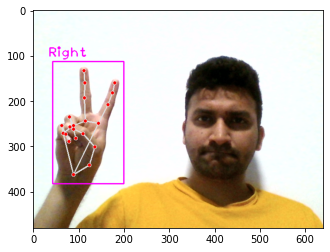

In [19]:
img_A = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

<a id="6"></a>
<h1> Download dataset. </h1> 

In [2]:
!gdown 1a5PC2teszCPxSf_7QHakbNm3JTkG6sDk
!unzip MP_img700.zip

Downloading...
From: https://drive.google.com/uc?id=1a5PC2teszCPxSf_7QHakbNm3JTkG6sDk
To: E:\Study Material\RTD_ASL\ASL_main codes\MP_imgdata_700.zip

  0%|          | 0.00/434M [00:00<?, ?B/s]
  1%|          | 2.62M/434M [00:00<00:17, 25.2MB/s]
  1%|1         | 5.24M/434M [00:00<00:28, 15.2MB/s]
  2%|1         | 7.34M/434M [00:00<00:31, 13.5MB/s]
  2%|2         | 9.44M/434M [00:00<00:30, 14.0MB/s]
  3%|2         | 11.0M/434M [00:00<00:32, 12.9MB/s]
  3%|2         | 12.6M/434M [00:00<00:32, 13.0MB/s]
  3%|3         | 14.2M/434M [00:01<00:31, 13.4MB/s]
  4%|3         | 15.7M/434M [00:01<00:32, 12.7MB/s]
  4%|3         | 17.3M/434M [00:01<00:33, 12.6MB/s]
  4%|4         | 18.9M/434M [00:01<00:34, 12.2MB/s]
  5%|4         | 20.4M/434M [00:01<00:34, 11.9MB/s]
  5%|5         | 22.0M/434M [00:01<00:35, 11.7MB/s]
  6%|5         | 24.1M/434M [00:01<00:31, 12.8MB/s]
  6%|5         | 25.7M/434M [00:01<00:31, 13.0MB/s]
  6%|6         | 27.3M/434M [00:02<00:31, 12.8MB/s]
  7%|6         | 28.8M/434

<a id="6"></a>
<h1> Loading trained model. </h1> 

In [5]:
import os
import cv2
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from cvzone.HandTrackingModule import HandDetector

from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier

from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

In [6]:
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [9]:
# Load the model
model = load_model('Eff_det_d0/model.h5')

data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [11]:
# Replace this with the path to your image
image = Image.open('Test/I.jpg')

size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)


1/1 [==============================] - 1s 718ms/step
[[5.5027044e-08 1.2434533e-13 5.5046072e-11 2.3968981e-08 8.0588252e-06
  8.0469492e-14 1.0333084e-12 8.1908215e-14 9.9993682e-01 6.4444461e-10
  4.8626498e-06 5.2612638e-08 1.0528562e-06 4.3913042e-06 4.1206502e-05
  1.5054813e-15 5.4424358e-08 5.1984361e-25 3.4260913e-06 7.1473728e-08
  7.5603464e-14 1.7904979e-09 9.8532185e-14 3.6391888e-12 3.3799116e-11
  1.5573215e-09]]


In [12]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 26)                130700    
                                                                 
Total params: 540,908
Trainable params: 526,828
Non-trainable params: 14,080
_________________________________________________________________


<a id="2"></a>
<h1> Real Time Sign Recognition</h1> 

In [22]:
# # for UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually
# import keras
# optimizer = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.compile(optimizer=optimizer,
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# model.save(...)


eff_det_d0 = Classifier("Eff_det_d0/model.h5", "Eff_det_d0/labels.txt")
mobileNet_v2 = Classifier("MobileNet_v2/model.h5", "MobileNet_v2/labels.txt")
tm_model = Classifier("teachable_machine_model/keras_model.h5", "teachable_machine_model/labels.txt")

cls = eff_det_d0

In [23]:
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)


folder = "Webcam_Test"
print("Press 'S' to save and 'Q' to quit")

offset = 20
imgSize = 300
counter = 0
while True:
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        imgCropShape = imgCrop.shape

        aspectRatio = h / w
        try:
            if aspectRatio > 1:
                k = imgSize / h
                wCal = math.ceil(k * w)
                imgResize = cv2.resize(imgCrop, (wCal, imgSize))
                imgResizeShape = imgResize.shape
                wGap = math.ceil((imgSize - wCal) / 2)
                imgWhite[:, wGap:wCal + wGap] = imgResize
                prediction, index = cls.getPrediction(imgWhite, draw=False)

            else:
                k = imgSize / w
                hCal = math.ceil(k * h)
                imgResize = cv2.resize(imgCrop, (imgSize, hCal))
                imgResizeShape = imgResize.shape
                hGap = math.ceil((imgSize - hCal) / 2)
                imgWhite[hGap:hCal + hGap, :] = imgResize
                prediction, index = cls.getPrediction(imgWhite, draw=False)
        except:
            print("Hand went out of frame")
            break
        cv2.rectangle(imgOutput, 
                      (x - offset, y - offset-50),
                      (x - offset+90, y - offset-50+50),
                      (255, 0, 255), cv2.FILLED)
        
        cv2.putText(imgOutput, 
                    labels[index], 
                    (x, y -26), 
                    cv2.FONT_HERSHEY_COMPLEX, 
                    1.7, 
                    (255, 255, 255), 
                    2)
        
        cv2.rectangle(imgOutput, 
                      (x-offset, y-offset),
                      (x + w+offset, 
                       y + h+offset), 
                      (255, 0, 255), 4)

        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", imgWhite)

    cv2.imshow("Image", imgOutput)
    key = cv2.waitKey(1)
    # save image
    if key == ord("S"): 
        cv2.imwrite(f"{folder}/{'_'+str(counter)}.jpg",imgWhite)
        counter += 1
        
    # Break gracefully
    if key == ord("Q"):
        break
cap.release()
cv2.destroyAllWindows()    

Press 'S' to save and 'Q' to quit
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 25ms/step
Hand went out of frame


In [17]:
cap.release()
cv2.destroyAllWindows()